# Average and deviation std of the models for the loss
The loss is the Mean Square Error, basicaly same stuff of Euclidean distance between two matrix

In [1]:
import os
import numpy as np
import re
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def extract_lastLoss(directory):
    # Extract last loss from all the models
    lastLoss_tuples = []
    # Loop through each file in the directory
    for filename in os.listdir(directory):
        file_path = os.path.join(directory, filename)       # Construct the full file path
        if os.path.isfile(file_path):       # Check if it is a file
            result_sim = np.load(file_path, allow_pickle=True)
            lastLoss_tuples.extend([(label, array[-1]) for label, array in result_sim if 'loss' in label])

    # Creating df
    return pd.DataFrame(lastLoss_tuples, columns=['label', 'value'])


In [3]:
def models_repmin_mean_devstd(df, name_models):
    # Extracting the base label (e.g., 'LabelA', 'LabelB')
    df['label_no_rep'] = df['label'].apply(lambda x: x.split('_rep')[0])
    # Group with the base label and find min
    min_lastLoss_s = df.groupby('label_no_rep')['value'].min()
    # print(min_lastLoss_s)

    mean_models= []
    std_dev_models =[]
    for name in name_models:
        # take the same model 
        model_s = min_lastLoss_s[min_lastLoss_s.index.str.contains(name)]
        mean_models.append(model_s.mean())
        std_dev_models.append(model_s.std())
    
    return mean_models, std_dev_models

In [4]:
def models_repmax_mean_devstd(df, name_models):
    # Extracting the base label (e.g., 'LabelA', 'LabelB')
    df['label_no_rep'] = df['label'].apply(lambda x: x.split('_rep')[0])
    # Group with the base label and find min
    max_lastLoss_s = df.groupby('label_no_rep')['value'].max()
    # print(min_lastLoss_s)

    mean_models= []
    std_dev_models =[]
    for name in name_models:
        # take the same model 
        model_s = max_lastLoss_s[max_lastLoss_s.index.str.contains(name)]
        mean_models.append(model_s.mean())
        std_dev_models.append(model_s.std())
    
    return mean_models, std_dev_models

## N = 4

In [5]:
directory = '20240420_N4_HPC_simulation/'
name_models = ['ClementsBellNxN', 'FldzhyanBellNxN', 'FldzhyanBellHalfNxN', 'NEUROPULSBonus_unitaryNxN', 'NEUROPULSBonus_unitary_2long_NxN',
            'NEUROPULSBonus_anymatrixNxN', 'NEUROPULSBonus_Bell_Minht_NxN', 'NEUROPULSBonus_BellNormal_NxN',
            'CB_withMZI', 'FB_withMZI', 'FBH_withMZI', 'NPBU_withMZI',]

lastLoss_df = extract_lastLoss(directory)
mean_models, std_dev_models = models_repmin_mean_devstd(lastLoss_df, name_models)

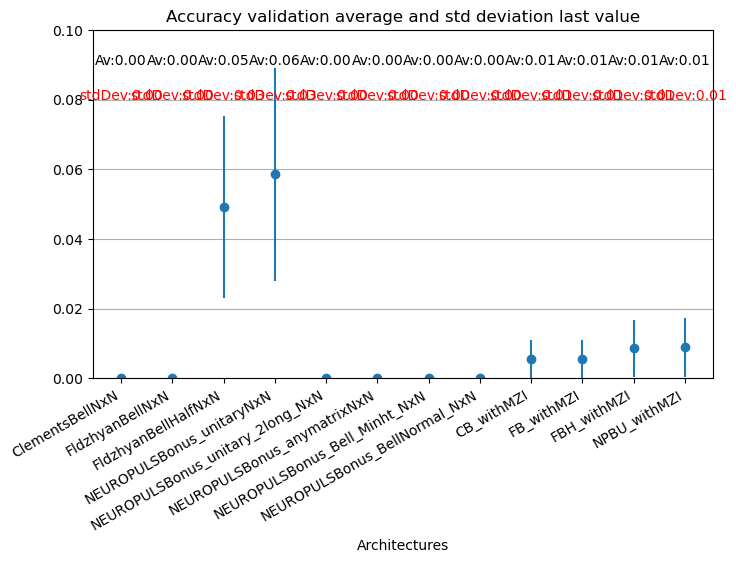

In [6]:
fig = plt.figure(figsize=(8, 6))
plt.errorbar(name_models, mean_models, yerr=std_dev_models, fmt='o')
for i in range(len(name_models)):
    plt.text(name_models[i], 0.09, f"Av:{mean_models[i]:.2f}", ha='center')
    plt.text(name_models[i], 0.08, f"stdDev:{std_dev_models[i]:.2f}", ha='center', color='red')
plt.title("Accuracy validation average and std deviation last value")
fig.autofmt_xdate()
plt.xlabel("Architectures")
fig.subplots_adjust(bottom=0.3)
plt.ylim([0.0, 0.10])
plt.grid(axis='y')
plt.savefig("Test" + ".png", dpi=399)
plt.show();

In [7]:
results_df = pd.DataFrame({
    'label': name_models,
    'average_value': mean_models,
    'std_dev_value': std_dev_models
})
results_df


,label,average_value,std_dev_value
0,ClementsBellNxN,2.845287e-12,5.322937e-11
1,FldzhyanBellNxN,4.199014e-11,5.656005e-10
2,FldzhyanBellHalfNxN,4.934030e-02,2.614840e-02
3,NEUROPULSBonus_unitaryNxN,5.859767e-02,3.068309e-02
4,NEUROPULSBonus_unitary_2long_NxN,3.980588e-12,7.552624e-11
5,NEUROPULSBonus_anymatrixNxN,1.174853e-06,1.732721e-05
6,NEUROPULSBonus_Bell_Minht_NxN,1.315270e-06,1.733960e-05
7,NEUROPULSBonus_BellNormal_NxN,1.288532e-04,1.862462e-04
8,CB_withMZI,5.522496e-03,5.406058e-03
9,FB_withMZI,5.522546e-03,5.406064e-03


If I take the worst data meaning the repetition that has the higher loss the result very bad?

In [8]:
directory = '20240420_N4_HPC_simulation/'
name_models = ['ClementsBellNxN', 'FldzhyanBellNxN', 'FldzhyanBellHalfNxN', 'NEUROPULSBonus_unitaryNxN', 'NEUROPULSBonus_unitary_2long_NxN',
            'NEUROPULSBonus_anymatrixNxN', 'NEUROPULSBonus_Bell_Minht_NxN', 'NEUROPULSBonus_BellNormal_NxN',
            'CB_withMZI', 'FB_withMZI', 'FBH_withMZI', 'NPBU_withMZI',]

lastLoss_df = extract_lastLoss(directory)
mean_models, std_dev_models = models_repmax_mean_devstd(lastLoss_df, name_models)

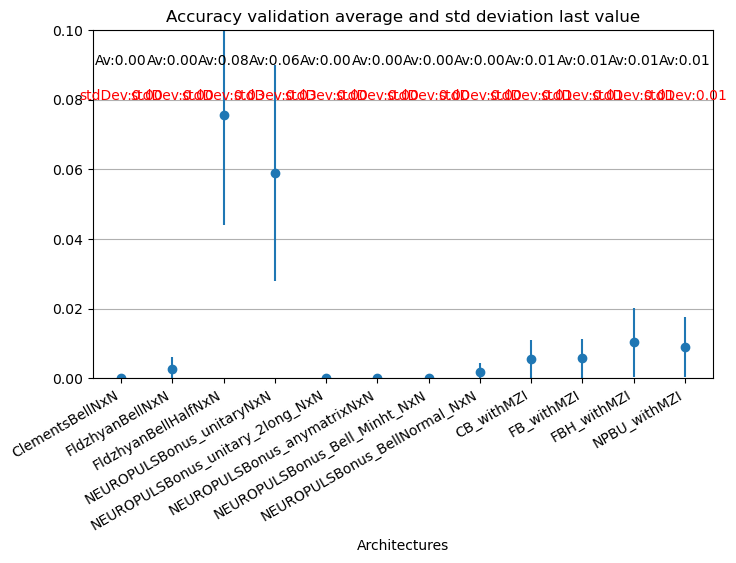

In [9]:
fig = plt.figure(figsize=(8, 6))
plt.errorbar(name_models, mean_models, yerr=std_dev_models, fmt='o')
for i in range(len(name_models)):
    plt.text(name_models[i], 0.09, f"Av:{mean_models[i]:.2f}", ha='center')
    plt.text(name_models[i], 0.08, f"stdDev:{std_dev_models[i]:.2f}", ha='center', color='red')
plt.title("Accuracy validation average and std deviation last value")
fig.autofmt_xdate()
plt.xlabel("Architectures")
fig.subplots_adjust(bottom=0.3)
plt.ylim([0.0, 0.10])
plt.grid(axis='y')
plt.savefig("Test" + ".png", dpi=399)
plt.show();

In [10]:
results_df = pd.DataFrame({
    'label': name_models,
    'average_value': mean_models,
    'std_dev_value': std_dev_models
})
results_df

,label,average_value,std_dev_value
0,ClementsBellNxN,5.645116e-08,1.616154e-07
1,FldzhyanBellNxN,2.719945e-03,3.506620e-03
2,FldzhyanBellHalfNxN,7.577473e-02,3.171340e-02
3,NEUROPULSBonus_unitaryNxN,5.898708e-02,3.096210e-02
4,NEUROPULSBonus_unitary_2long_NxN,6.875986e-05,3.921502e-04
5,NEUROPULSBonus_anymatrixNxN,5.367525e-05,1.843355e-04
6,NEUROPULSBonus_Bell_Minht_NxN,1.150930e-04,2.815316e-04
7,NEUROPULSBonus_BellNormal_NxN,1.706766e-03,2.632763e-03
8,CB_withMZI,5.522516e-03,5.406052e-03
9,FB_withMZI,5.692884e-03,5.528395e-03


If I take just less repetition like 5 repetition how about the results?

In [27]:
def models_5repmin_mean_devstd(df, name_models):
    # Extracting the base label (e.g., 'LabelA', 'LabelB')
    df['label_no_rep'] = df['label'].apply(lambda x: x.split('_rep')[0] if x.endswith(('_rep0', '_rep1', '_rep2', '_rep3', '_rep4')) else x)
    # Group with the base label and find min
    min_lastLoss_s = df.groupby('label_no_rep')['value'].min()
    min_lastLoss_filtered_s = min_lastLoss_s[~min_lastLoss_s.index.str.contains('_rep')]
    # print(min_lastLoss_s)
    mean_models= []
    std_dev_models =[]
    for name in name_models:
        # take the same model 
        model_s = min_lastLoss_filtered_s[min_lastLoss_filtered_s.index.str.contains(name)]
        mean_models.append(model_s.mean())
        std_dev_models.append(model_s.std())
    return mean_models, std_dev_models

directory = '20240420_N4_HPC_simulation/'
name_models = ['ClementsBellNxN', 'FldzhyanBellNxN', 'FldzhyanBellHalfNxN', 'NEUROPULSBonus_unitaryNxN', 'NEUROPULSBonus_unitary_2long_NxN']

lastLoss_df = extract_lastLoss(directory)
mean_models, std_dev_models = models_5repmin_mean_devstd(lastLoss_df, name_models)

results_df = pd.DataFrame({
    'label': name_models,
    'average_value': mean_models,
    'std_dev_value': std_dev_models
})
results_df

,label,average_value,std_dev_value
0,ClementsBellNxN,2.173566e-11,2.974524e-10
1,FldzhyanBellNxN,1.423151e-06,1.782717e-05
2,FldzhyanBellHalfNxN,4.970423e-02,2.632268e-02
3,NEUROPULSBonus_unitaryNxN,5.859767e-02,3.068309e-02
4,NEUROPULSBonus_unitary_2long_NxN,2.459549e-10,6.426498e-09


Take the worst data with just 5 repetitions

In [25]:
def models_5repmax_mean_devstd(df, name_models):
    # Extracting the base label (e.g., 'LabelA', 'LabelB')
    df['label_no_rep'] = df['label'].apply(lambda x: x.split('_rep')[0] if x.endswith(('_rep0', '_rep1', '_rep2', '_rep3', '_rep4')) else x)
    # Group with the base label and find min
    max_lastLoss_s = df.groupby('label_no_rep')['value'].max()
    max_lastLoss_filtered_s = max_lastLoss_s[~max_lastLoss_s.index.str.contains('_rep')]
    # print(min_lastLoss_s)

    mean_models= []
    std_dev_models =[]
    for name in name_models:
        # take the same model 
        model_s = max_lastLoss_filtered_s[max_lastLoss_filtered_s.index.str.contains(name)]
        mean_models.append(model_s.mean())
        std_dev_models.append(model_s.std())
    
    return mean_models, std_dev_models


directory = '20240420_N4_HPC_simulation/'
name_models = ['ClementsBellNxN', 'FldzhyanBellNxN', 'FldzhyanBellHalfNxN', 'NEUROPULSBonus_unitaryNxN', 'NEUROPULSBonus_unitary_2long_NxN']

lastLoss_df = extract_lastLoss(directory)
mean_models, std_dev_models = models_5repmax_mean_devstd(lastLoss_df, name_models)

results_df = pd.DataFrame({
    'label': name_models,
    'average_value': mean_models,
    'std_dev_value': std_dev_models
})
results_df

,label,average_value,std_dev_value
0,ClementsBellNxN,3.217309e-08,8.659205e-08
1,FldzhyanBellNxN,1.782096e-03,3.021791e-03
2,FldzhyanBellHalfNxN,7.055424e-02,3.007195e-02
3,NEUROPULSBonus_unitaryNxN,5.889916e-02,3.085988e-02
4,NEUROPULSBonus_unitary_2long_NxN,4.015231e-05,2.680878e-04


In [26]:
def models_3repmin_mean_devstd(df, name_models):
    # Extracting the base label (e.g., 'LabelA', 'LabelB')
    df['label_no_rep'] = df['label'].apply(lambda x: x.split('_rep')[0] if x.endswith(('_rep0', '_rep1', '_rep2')) else x)
    # Group with the base label and find min
    min_lastLoss_s = df.groupby('label_no_rep')['value'].min()
    min_lastLoss_filtered_s = min_lastLoss_s[~min_lastLoss_s.index.str.contains('_rep')]
    # print(min_lastLoss_s)
    mean_models= []
    std_dev_models =[]
    for name in name_models:
        # take the same model 
        model_s = min_lastLoss_filtered_s[min_lastLoss_filtered_s.index.str.contains(name)]
        mean_models.append(model_s.mean())
        std_dev_models.append(model_s.std())
    return mean_models, std_dev_models

directory = '20240420_N4_HPC_simulation/'
name_models = ['ClementsBellNxN', 'FldzhyanBellNxN', 'FldzhyanBellHalfNxN', 'NEUROPULSBonus_unitaryNxN', 'NEUROPULSBonus_unitary_2long_NxN']

lastLoss_df = extract_lastLoss(directory)
mean_models, std_dev_models = models_3repmin_mean_devstd(lastLoss_df, name_models)

results_df = pd.DataFrame({
    'label': name_models,
    'average_value': mean_models,
    'std_dev_value': std_dev_models
})
results_df

,label,average_value,std_dev_value
0,ClementsBellNxN,1.638814e-10,1.223940e-09
1,FldzhyanBellNxN,2.772316e-05,1.665710e-04
2,FldzhyanBellHalfNxN,5.095488e-02,2.660181e-02
3,NEUROPULSBonus_unitaryNxN,5.860172e-02,3.068362e-02
4,NEUROPULSBonus_unitary_2long_NxN,3.135620e-07,9.904129e-06


## N = 8

In [ ]:
directory = '20240420_N8_HPC_simulation/'
name_models = ['ClementsBellNxN', 'FldzhyanBellNxN', 'FldzhyanBellHalfNxN', 'NEUROPULSBonus_unitaryNxN', 'NEUROPULSBonus_unitary_2long_NxN',
            'NEUROPULSBonus_anymatrixNxN', 'NEUROPULSBonus_Bell_Minht_NxN', 'NEUROPULSBonus_BellNormal_NxN',
            'CB_withMZI', 'FB_withMZI', 'FBH_withMZI', 'NPBU_withMZI',]

lastLoss_df = extract_lastLoss(directory)
mean_models, std_dev_models = models_mean_devstd(lastLoss_df, name_models)

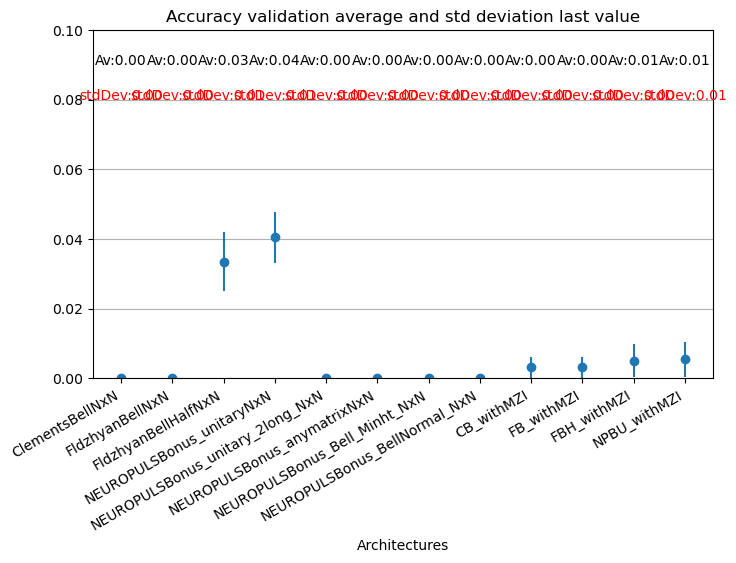

In [ ]:
fig = plt.figure(figsize=(8, 6))
plt.errorbar(name_models, mean_models, yerr=std_dev_models, fmt='o')
for i in range(len(name_models)):
    plt.text(name_models[i], 0.09, f"Av:{mean_models[i]:.2f}", ha='center')
    plt.text(name_models[i], 0.08, f"stdDev:{std_dev_models[i]:.2f}", ha='center', color='red')
plt.title("Accuracy validation average and std deviation last value")
fig.autofmt_xdate()
plt.xlabel("Architectures")
fig.subplots_adjust(bottom=0.3)
plt.ylim([0.0, 0.10])
plt.grid(axis='y')
plt.savefig("Test" + ".png", dpi=399)
plt.show();

In [ ]:
results_df = pd.DataFrame({
    'label': name_models,
    'average_value': mean_models,
    'std_dev_value': std_dev_models
})
results_df

,label,average_value,std_dev_value
0,ClementsBellNxN,2.157639e-08,1.163157e-07
1,FldzhyanBellNxN,5.641360e-07,2.672546e-06
2,FldzhyanBellHalfNxN,3.354157e-02,8.477709e-03
3,NEUROPULSBonus_unitaryNxN,4.049660e-02,7.361204e-03
4,NEUROPULSBonus_unitary_2long_NxN,1.019186e-11,9.174627e-11
5,NEUROPULSBonus_anymatrixNxN,6.705668e-06,3.411442e-05
6,NEUROPULSBonus_Bell_Minht_NxN,8.160357e-06,3.422159e-05
7,NEUROPULSBonus_BellNormal_NxN,2.241782e-05,3.762539e-05
8,CB_withMZI,3.215932e-03,3.036360e-03
9,FB_withMZI,3.215997e-03,3.036419e-03


## N = 16

In [ ]:
directory = '20240420_N16_HPC_simulation/'
name_models = ['ClementsBellNxN', 'FldzhyanBellNxN', 'FldzhyanBellHalfNxN', 'NEUROPULSBonus_unitaryNxN', 'NEUROPULSBonus_unitary_2long_NxN',
            'NEUROPULSBonus_anymatrixNxN', 'NEUROPULSBonus_Bell_Minht_NxN', 'NEUROPULSBonus_BellNormal_NxN',
            'CB_withMZI', 'FB_withMZI', 'FBH_withMZI', 'NPBU_withMZI',]

lastLoss_df = extract_lastLoss(directory)
mean_models, std_dev_models = models_mean_devstd(lastLoss_df, name_models)

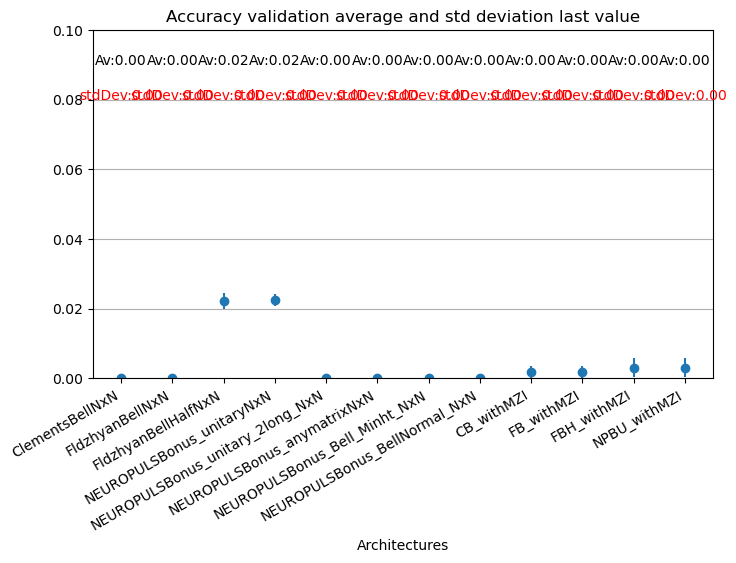

In [ ]:
fig = plt.figure(figsize=(8, 6))
plt.errorbar(name_models, mean_models, yerr=std_dev_models, fmt='o')
for i in range(len(name_models)):
    plt.text(name_models[i], 0.09, f"Av:{mean_models[i]:.2f}", ha='center')
    plt.text(name_models[i], 0.08, f"stdDev:{std_dev_models[i]:.2f}", ha='center', color='red')
plt.title("Accuracy validation average and std deviation last value")
fig.autofmt_xdate()
plt.xlabel("Architectures")
fig.subplots_adjust(bottom=0.3)
plt.ylim([0.0, 0.10])
plt.grid(axis='y')
plt.savefig("Test" + ".png", dpi=399)
plt.show();

In [ ]:
results_df = pd.DataFrame({
    'label': name_models,
    'average_value': mean_models,
    'std_dev_value': std_dev_models
})
results_df

,label,average_value,std_dev_value
0,ClementsBellNxN,0.000026,0.000017
1,FldzhyanBellNxN,0.000064,0.000027
2,FldzhyanBellHalfNxN,0.022126,0.002263
3,NEUROPULSBonus_unitaryNxN,0.022551,0.001792
4,NEUROPULSBonus_unitary_2long_NxN,0.000005,0.000002
5,NEUROPULSBonus_anymatrixNxN,0.000024,0.000015
6,NEUROPULSBonus_Bell_Minht_NxN,0.000024,0.000015
7,NEUROPULSBonus_BellNormal_NxN,0.000032,0.000017
8,CB_withMZI,0.001786,0.001648
9,FB_withMZI,0.001790,0.001652
